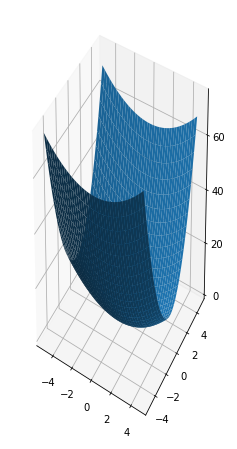

In [10]:
import numpy as np
from typing import *
import scipy.optimize as sopt
from tool.Viz import *

class AbbruchkriteriumMaximalIterationen:
    def __init__(self, max_n: int):
        assert  max_n > 0
        self.max = max_n
        self.counter = 0

    def __call__(self, value) -> bool:
        self.counter += 1
        return self.counter >= self.max


class AbbruchkriteriumNorm:
    def __init__(self, nabla_f, epsilon: float):
        self.nabla_f = nabla_f
        self.epsilon = epsilon

    def __call__(self, value) -> bool:
        return np.sqrt(sum(np.square(value))) > self.epsilon

class AbbruchKriteriumAufgabe:
    def __init__(self, nabla_f):
        self.__nabla_f = nabla_f
        
    def __call__(self, value):
        return np.sqrt(sum(np.square(self.__nabla_f(*value)))) <= 0.5

class GradientenVerfahren:
    def __init__(self, nabla_f, schrittweite, startpunkt, abbruchkriterium):
        assert schrittweite > 0
        self._nabla_f = nabla_f
        self._schrittweite = schrittweite
        self._startpunkt = startpunkt
        self._abbruchkriterium = abbruchkriterium
        self._xk = self._startpunkt

    def __call__(self, func = None):
        while not self._abbruchkriterium(self._xk):
            if func is not None:
                func(self._xk)
            self._xk = self._xk - self._schrittweite * self._nabla_f(*self._xk)


class GradientenVerfahrenMitBacktracking(GradientenVerfahren):
    def __init__(self, f, nabla_f, daempfungsfaktor, schrittweite, startpunkt, abbruchkriterium):
        super(GradientenVerfahrenMitBacktracking, self).__init__(nabla_f, schrittweite, startpunkt, abbruchkriterium)
        self._f = f
        self._daempfungsfaktor = daempfungsfaktor

    def __call__(self, func = None):
        while not self._abbruchkriterium(self._xk):
            while self._f(*(np.array(self._xk - self._schrittweite * self._nabla_f(*self._xk)))) > (self._f(*self._xk) - (self._schrittweite * .5) * abs(sum(np.square(self._nabla_f(*self._xk))))):
                self._schrittweite = self._daempfungsfaktor * self._schrittweite
            if func is not None:
                func(self._xk)
            self._xk = self._xk - self._schrittweite * self._nabla_f(*self._xk)


class GradientenVerfahrenSteepestDescent(GradientenVerfahren):
    def __init__(self, f, nabla_f, schrittweite, startpunkt, abbruchkriterium):
        super(GradientenVerfahrenSteepestDescent, self).__init__(nabla_f, schrittweite, startpunkt, abbruchkriterium)
        self._f = f

    def __call__(self, func = None):
        while not self._abbruchkriterium(self._xk):
            if func is not None:
                func(self._xk)
            self._xk = self._xk - self._schrittweite * self._nabla_f(*self._xk)
            self._schrittweite = sopt.fmin(lambda x: self._f(*(self._xk - x*self._nabla_f(*self._xk))), 0, disp=False)

f = lambda x, y: 0.5*(x**2) + 2.5*(y**2)

IT = IterationVisualizer3D(-5, 5, 0.25, -5, 5, 0.25, 2)
IT.plot(f)

GV = GradientenVerfahren(lambda x, y: np.array([x, 5*y]), 1, np.array([1, 2]), AbbruchkriteriumMaximalIterationen(10))
GV(lambda x: IT.add_point(x[0], x[1], f(*x)))

# G = GradientenVerfahrenMitBacktracking(lambda x, y: 0.5 * (x** 2) + 2.5 * (y**2), lambda x, y: np.array([x, 5*y]), 0.5, 1, np.array([1, 2]), AbbruchkriteriumMaximalIterationen(10))
# G(lambda x: print(x))

# Gs = GradientenVerfahrenSteepestDescent(lambda x, y: 0.5 * (x** 2) + 2.5 * (y**2), lambda x, y: np.array([x, 5*y]), 1, np.array([1, 2]), AbbruchkriteriumMaximalIterationen(10))
# Gs(lambda x: print(x))
